## Ciência de Dados em Larga Escala  
### Trabalho Prático - Performance Analysis  
## Bruno Costa e José Santos
# Grupo Z

---

- Resumo dos principais resultados obtidos:



In [1]:
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
koalas_standard1 = pd.read_parquet('Resultados/koalas_standard1')
koalas_standard2 = pd.read_parquet('Resultados/koalas_standard2')
koalas_standard3 = pd.read_parquet('Resultados/koalas_standard3')
koalas_filtered1 = pd.read_parquet('Resultados/koalas_filtered1')
koalas_filtered2 = pd.read_parquet('Resultados/koalas_filtered2')
koalas_filtered3 = pd.read_parquet('Resultados/koalas_filtered3')
koalas_cache1 = pd.read_parquet('Resultados/koalas_cache1')
dask_standard1 = pd.read_parquet('Resultados/dask_standard1')
dask_standard2 = pd.read_parquet('Resultados/dask_standard2')
dask_standard3 = pd.read_parquet('Resultados/dask_standard3')
dask_filtered1 = pd.read_parquet('Resultados/dask_filtered1')
dask_filtered2 = pd.read_parquet('Resultados/dask_filtered2')
dask_filtered3 = pd.read_parquet('Resultados/dask_filtered3')
dask_cache1 = pd.read_parquet('Resultados/dask_cache1')
dask_cache2 = pd.read_parquet('Resultados/dask_cache2')
dask_cache3 = pd.read_parquet('Resultados/dask_cache3')
modin_standard1 = pd.read_parquet('Resultados/modin_standard1')
modin_standard2 = pd.read_parquet('Resultados/modin_standard2')
modin_standard3 = pd.read_parquet('Resultados/modin_standard3')
modin_filtered1 = pd.read_parquet('Resultados/modin_filtered1')
modin_filtered2 = pd.read_parquet('Resultados/modin_filtered2')
modin_filtered3 = pd.read_parquet('Resultados/modin_filtered3')
modin_cache1 = pd.read_parquet('Resultados/modin_cache1')
modin_cache2 = pd.read_parquet('Resultados/modin_cache2')
modin_cache3 = pd.read_parquet('Resultados/modin_cache3')
joblib_standard1 = pd.read_parquet('Resultados/joblib_standard1')
joblib_filtered1 = pd.read_parquet('Resultados/joblib_filtered1')
joblib_cache1 = pd.read_parquet('Resultados/joblib_cache1')

In [3]:
nome_final = {
    'mean of columns addition': 'mean of sum',
    'mean of columns multiplication': 'mean of product',
    'count_index_length' : 'count index length',
    'standard_deviation' : 'standard deviation',
    'value_counts': 'value counts',
    'complicated_arithmetic_operation': 'complex arithmetic ops',
    'join_count': 'join count',
    'join_data': 'join',
    'groupby_statistics': 'groupby statistics',
    'mean_of_sum' : 'mean of sum',
    'mean_of_product': 'mean of product',
    'sum_columns': 'addition of columns',
    'product_columns': 'multiplication of columns',
    'cache count' : 'count',
    'cache mean': 'mean',
    'cache standard deviation': 'standard deviation',
    'cache mean of columns addition': 'mean of sum',
    'cache addition of columns': 'addition of columns',
    'cache mean of columns multiplication': 'mean of product',
    'cache multiplication of columns': 'multiplication of columns',
    'cache complex arithmetic ops': 'complex arithmetic ops',
    'cache value counts': 'value counts',
    'cache groupby statistics': 'groupby statistics',
    'filtered count' : 'count',
    'filtered mean': 'mean',
    'filtered standard deviation': 'standard deviation',
    'filtered mean of columns addition': 'mean of sum',
    'filtered addition of columns': 'addition of columns',
    'filtered mean of columns multiplication': 'mean of product',
    'filtered multiplication of columns': 'multiplication of columns',
    'filtered complex arithmetic ops': 'complex arithmetic ops',
    'filtered value counts': 'value counts',
    'filtered groupby statistics': 'groupby statistics',
    'cache count index length': 'count index length',
    'filtered mean of complex arithmetic ops': 'mean of complex arithmetic ops',
    'filtered count index length': 'count index length',
    'cache mean of complex arithmetic ops' : 'mean of complex arithmetic ops'
}

def mudar_linhas(df):
    df = df.rename(index=nome_final)
    return df

In [4]:
koalas_standard1 = mudar_linhas(koalas_standard1)
koalas_standard2 = mudar_linhas(koalas_standard2)
koalas_standard3 = mudar_linhas(koalas_standard3)
koalas_filtered1 = mudar_linhas(koalas_filtered1)
koalas_filtered2 = mudar_linhas(koalas_filtered2)
koalas_filtered3 = mudar_linhas(koalas_filtered3)
koalas_cache1 = mudar_linhas(koalas_cache1)
dask_standard1 = mudar_linhas(dask_standard1)
dask_standard2 = mudar_linhas(dask_standard2)
dask_standard3 = mudar_linhas(dask_standard3)
dask_filtered1 = mudar_linhas(dask_filtered1)
dask_filtered2 = mudar_linhas(dask_filtered2)
dask_filtered3 = mudar_linhas(dask_filtered3)
dask_cache1 = mudar_linhas(dask_cache1)
dask_cache2 = mudar_linhas(dask_cache2)
dask_cache3 = mudar_linhas(dask_cache3)
modin_standard1 = mudar_linhas(modin_standard1)
modin_standard2 = mudar_linhas(modin_standard2)
modin_standard3 = mudar_linhas(modin_standard3)
modin_filtered1 = mudar_linhas(modin_filtered1)
modin_filtered2 = mudar_linhas(modin_filtered2)
modin_filtered3 = mudar_linhas(modin_filtered3)
modin_cache1 = mudar_linhas(modin_cache1)
modin_cache2 = mudar_linhas(modin_cache2)
modin_cache3 = mudar_linhas(modin_cache3)
joblib_standard1 = mudar_linhas(joblib_standard1)
joblib_filtered1 = mudar_linhas(joblib_filtered1)
joblib_cache1 = mudar_linhas(joblib_cache1)


# Resumo Geral

In [5]:
import pandas as pd
dfs = [
    koalas_standard1['duration'], koalas_standard2['duration'], koalas_standard3['duration'],
    koalas_filtered1['duration'], koalas_filtered2['duration'], koalas_filtered3['duration'],
    koalas_cache1['duration'],
    dask_standard1['duration'], dask_standard2['duration'], dask_standard3['duration'],
    dask_filtered1['duration'], dask_filtered2['duration'], dask_filtered3['duration'],
    dask_cache1['duration'], dask_cache2['duration'], dask_cache3['duration'],
    modin_standard1['duration'], modin_standard2['duration'], modin_standard3['duration'],
    modin_filtered1['duration'], modin_filtered2['duration'], modin_filtered3['duration'],
    modin_cache1['duration'], modin_cache2['duration'], modin_cache3['duration'],
    joblib_standard1['duration'],joblib_filtered1['duration'],joblib_cache1['duration']
]
labels = [
    'Koalas_standard1', 'Koalas_standard2', 'Koalas_standard3',
    'Koalas_filtered1', 'Koalas_filtered2', 'Koalas_filtered3',
    'Koalas_cache1',
    'Dask_standard1', 'Dask_standard2', 'Dask_standard3',
    'Dask_filtered1', 'Dask_filtered2', 'Dask_filtered3',
    'Dask_cache1', 'Dask_cache2', 'Dask_cache3',
    'Modin_standard1', 'Modin_standard2', 'Modin_standard3',
    'Modin_filtered1', 'Modin_filtered2', 'Modin_filtered3',
    'Modin_cache1', 'Modin_cache2', 'Modin_cache3',
    'Joblib_standard1','Joblib_filtered1','Joblib_cache1'
]

resultados_total = pd.concat(dfs, axis=1, keys=labels)
resultados_total

,Koalas_standard1,Koalas_standard2,Koalas_standard3,Koalas_filtered1,Koalas_filtered2,Koalas_filtered3,Koalas_cache1,Dask_standard1,Dask_standard2,Dask_standard3,...,Modin_standard3,Modin_filtered1,Modin_filtered2,Modin_filtered3,Modin_cache1,Modin_cache2,Modin_cache3,Joblib_standard1,Joblib_filtered1,Joblib_cache1
task,,,,,,,,,,,,,,,,,,,,,
read file,0.146486,NaN,NaN,0.108400,NaN,NaN,NaN,0.008968,NaN,NaN,...,NaN,20.966774,NaN,NaN,21.437351,NaN,NaN,NaN,NaN,NaN
count,0.260101,0.188467,0.100488,0.480750,0.078855,0.059304,NaN,0.012008,0.014253,0.015950,...,0.000009,0.000015,0.000012,0.000005,0.723322,29.612004,0.071512,0.000012,0.000003,0.000006
count index length,0.177728,0.110545,0.092547,0.411687,0.070080,0.059749,NaN,0.014466,0.006908,0.005138,...,0.000002,0.000002,0.000005,0.000001,0.064912,0.065783,0.072427,0.000002,0.000002,0.000002
mean,0.462935,0.459912,0.372806,0.661548,0.274277,0.334668,NaN,15.407151,16.305419,50.260206,...,0.091190,0.009747,0.015623,0.022949,0.001605,0.001077,0.001202,0.030734,0.007900,0.007941
standard deviation,0.539421,0.490740,0.450633,0.682728,0.383212,0.412029,NaN,15.653548,16.506136,20.033471,...,0.513180,0.043722,0.070431,0.127806,0.004870,0.004884,0.004634,0.167448,0.034911,0.042278
mean of sum,0.649884,0.614201,0.697650,0.677189,0.446260,0.536743,NaN,15.386676,16.219947,35.095469,...,0.257434,0.022001,0.031339,0.063530,0.015379,0.001774,0.002048,0.081894,0.015485,0.020459
mean of product,0.610726,0.600098,0.728425,0.645065,0.517670,0.514372,NaN,15.549762,16.085194,33.937149,...,0.255933,0.015380,0.031000,0.064362,0.001489,0.001565,0.002550,0.082546,0.015072,0.014976
value counts,1.557297,1.599671,1.303024,1.089473,1.172370,1.266447,NaN,16.776376,16.023526,NaN,...,0.496008,0.043733,0.081831,0.126803,0.000649,0.000755,0.000632,0.169348,0.042573,0.044040
groupby statistics,NaN,1.454074,1.605773,1.043396,1.501306,1.546516,NaN,14.650766,16.776670,NaN,...,1.873128,0.171512,0.301315,0.476906,0.087090,0.021100,0.017593,0.618865,0.146597,0.162462


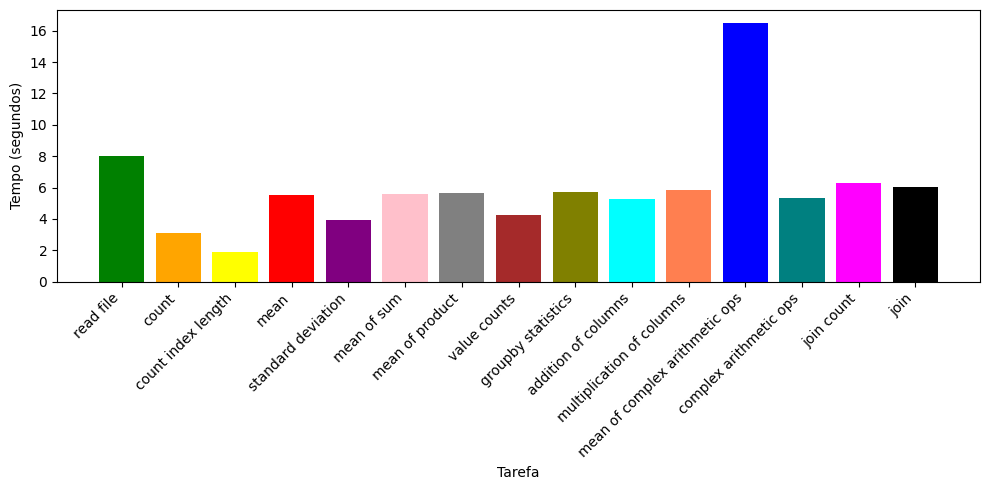

In [6]:
mean_times = resultados_total.mean(axis=1)

resultados_total_media = pd.DataFrame(mean_times, columns=['Tempo Médio'])

tasks = resultados_total_media.index.tolist()
tempos = resultados_total_media['Tempo Médio'].tolist()

cor_final = ['green', 'orange', 'yellow', 'red', 'purple', 'pink', 'gray', 'brown', 'olive', 'cyan', 
         'coral', 'blue', 'teal', 'magenta', 'black']

plt.figure(figsize=(10, 5))
plt.bar(tasks, tempos, color=cor_final)
plt.xlabel('Tarefa')
plt.ylabel('Tempo (segundos)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

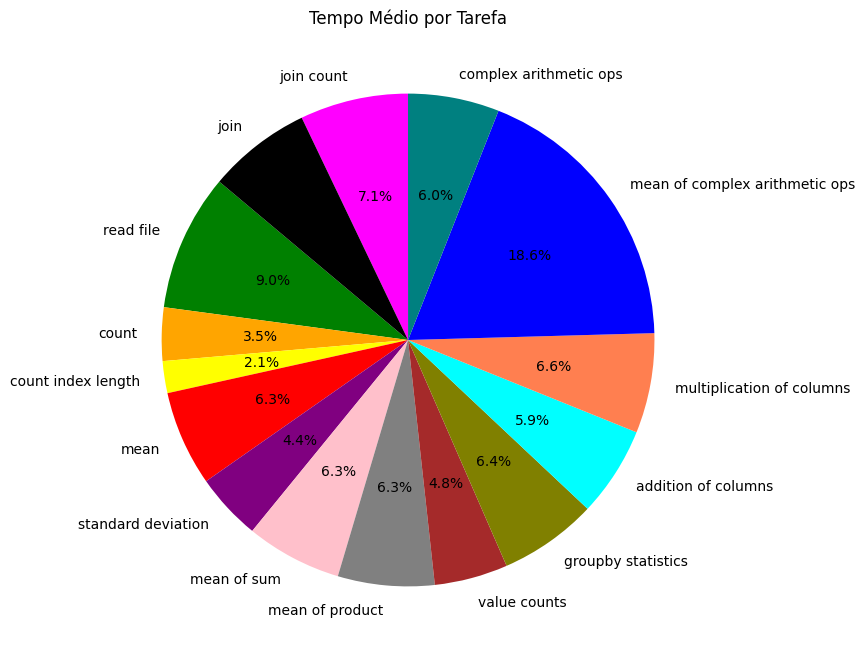

In [7]:
import matplotlib.pyplot as plt

tasks = resultados_total_media.index.tolist()
tempos = resultados_total_media['Tempo Médio'].tolist()
cor_final = ['green', 'orange', 'yellow', 'red', 'purple', 'pink', 'gray', 'brown', 'olive', 'cyan', 
         'coral', 'blue', 'teal', 'magenta', 'black']
plt.figure(figsize=(8, 8))
plt.pie(tempos, labels=tasks, colors=cor_final, autopct='%1.1f%%', startangle=140)
plt.title('Tempo Médio por Tarefa')
plt.show()

## Observações

- Em média, a operação mais demorada foi a média das operações aritméticas complexas, enquanto a mais rápida foi a contagem do comprimento do índice.
  
### Comparação das Bibliotecas

- Dois tipos de gráficos foram gerados:
  - Um gráfico de barras com a média de duração por biblioteca.
  - Um gráfico de barras empilhadas com o tempo total por operação.



# 1 Ficheiro

# Dados

In [8]:
resultados_standard_concatenado = pd.concat([
    koalas_standard1['duration'], dask_standard1['duration'], modin_standard1['duration'], joblib_standard1['duration'] 
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib'])
resultados_standard_concatenado

,Koalas,Dask,Modin,Joblib
task,,,,
read file,0.146486,0.008968,21.160190,NaN
count,0.260101,0.012008,0.000015,0.000012
count index length,0.177728,0.014466,0.000006,0.000002
mean,0.462935,15.407151,0.086643,0.030734
standard deviation,0.539421,15.653548,0.204169,0.167448
mean of sum,0.649884,15.386676,0.083436,0.081894
mean of product,0.610726,15.549762,0.082902,0.082546
value counts,1.557297,16.776376,0.309777,0.169348
addition of columns,NaN,15.686277,0.074373,0.073533


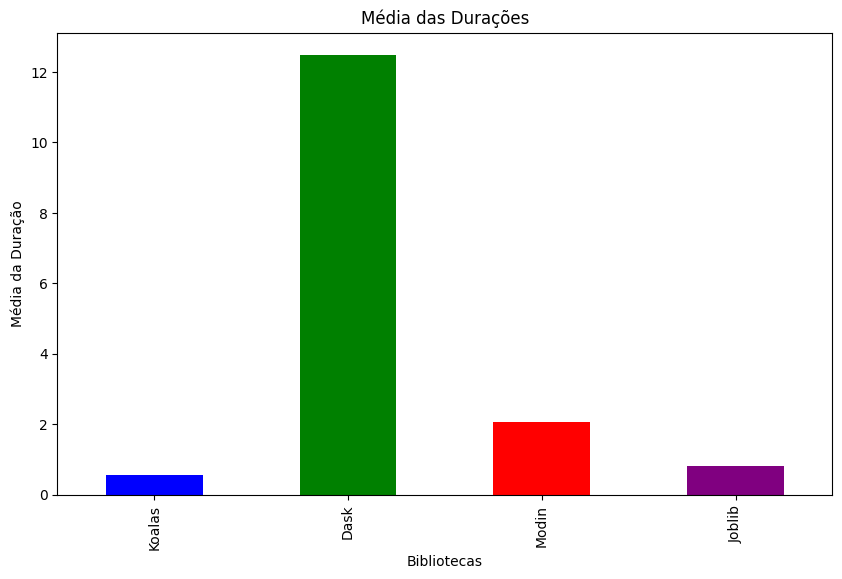

In [9]:
mean_durations_standard = resultados_standard_concatenado.mean()
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(10, 6))
mean_durations_standard.plot(kind='bar', color=colors)
plt.title('Média das Durações')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

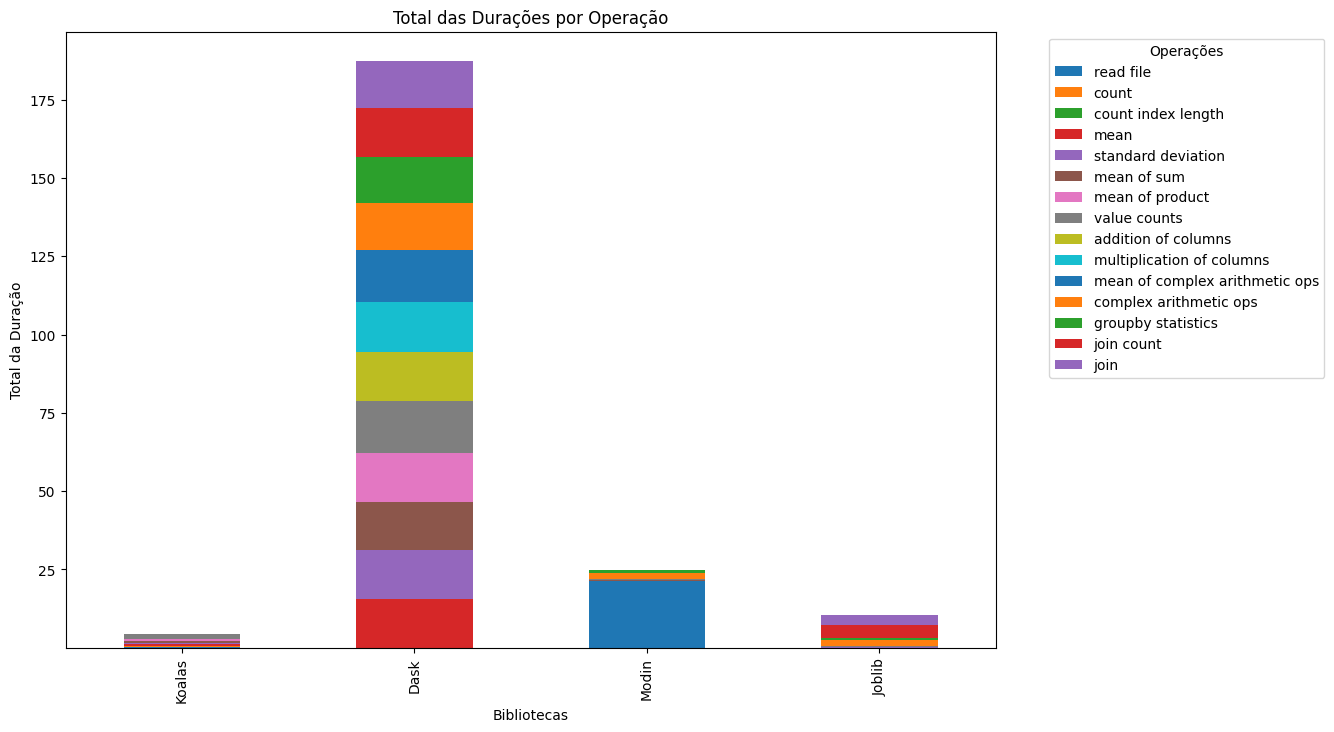

In [10]:
resultados_standard_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados com 1 ficheiro:

- Joblib e Koalas apresentam os menores tempos médios de execução.
- Dask é a biblioteca mais lenta nesse cenário.
- Em termos de tempo total:
  - No Modin, o maior contributo vem da leitura do ficheiro.


# Dados Filtrados

In [11]:
resultados_filtered_concatenado = pd.concat([
    koalas_filtered1['duration'], dask_filtered1['duration'], modin_filtered1['duration'], joblib_filtered1['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin', 'Joblib'])

resultados_filtered_concatenado

,Koalas,Dask,Modin,Joblib
task,,,,
read file,0.108400,0.007889,20.966774,NaN
count,0.480750,15.091957,0.000015,0.000003
count index length,0.411687,15.131043,0.000002,0.000002
mean,0.661548,15.251712,0.009747,0.007900
standard deviation,0.682728,13.730219,0.043722,0.034911
mean of sum,0.677189,15.557946,0.022001,0.015485
mean of product,0.645065,15.678725,0.015380,0.015072
value counts,1.089473,16.651477,0.043733,0.042573
groupby statistics,1.043396,16.225968,0.171512,0.146597


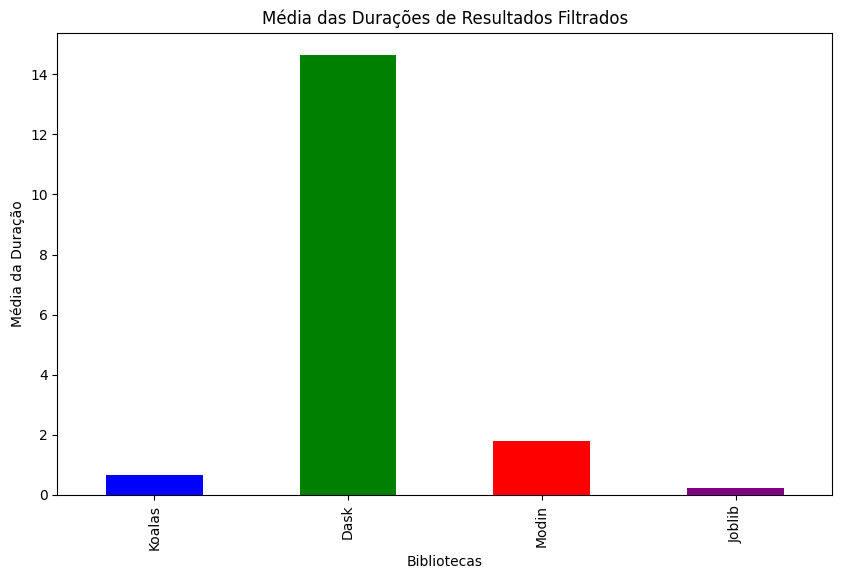

In [12]:
mean_durations_filtered = resultados_filtered_concatenado.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

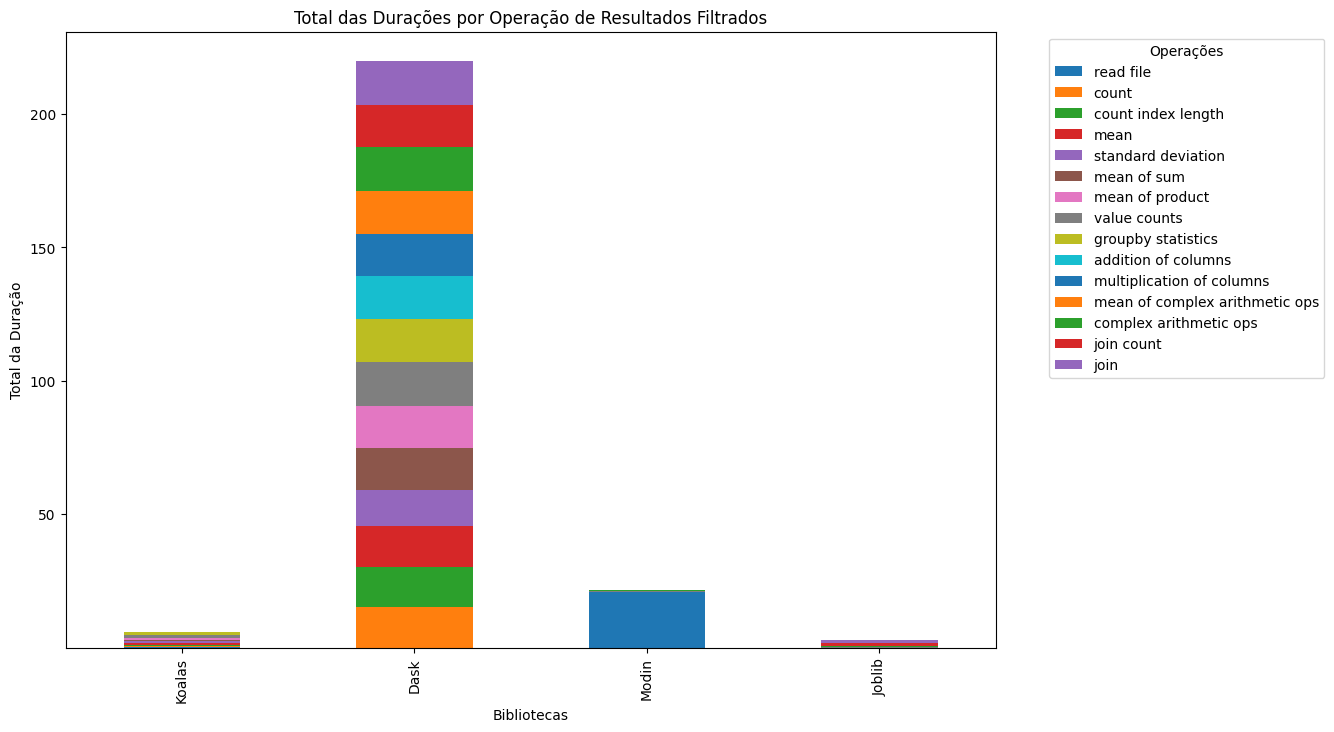

In [13]:
resultados_filtered_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados filtrados com 1 ficheiro:

- Joblib continua com os menores tempos médios, seguida por Koalas.
- Dask permanece como a mais lenta.
- O tempo total é dominado pela leitura de ficheiros no Modin.



# Dados Filtrados com Cache

In [14]:
resultados_cache_concatenado = pd.concat([
 dask_cache1['duration'], modin_cache1['duration'], joblib_cache1['duration'], 
], axis=1, keys=['Dask', 'Modin', 'Joblib'])

resultados_cache_concatenado

,Dask,Modin,Joblib
task,,,
read file,0.009152,21.437351,NaN
count,0.035454,0.723322,0.000006
count index length,0.031214,0.064912,0.000002
mean,0.056138,0.001605,0.007941
standard deviation,0.115044,0.004870,0.042278
mean of sum,0.071108,0.015379,0.020459
addition of columns,0.265028,0.001772,0.013000
mean of product,0.069629,0.001489,0.014976
multiplication of columns,0.286330,0.001903,0.012778


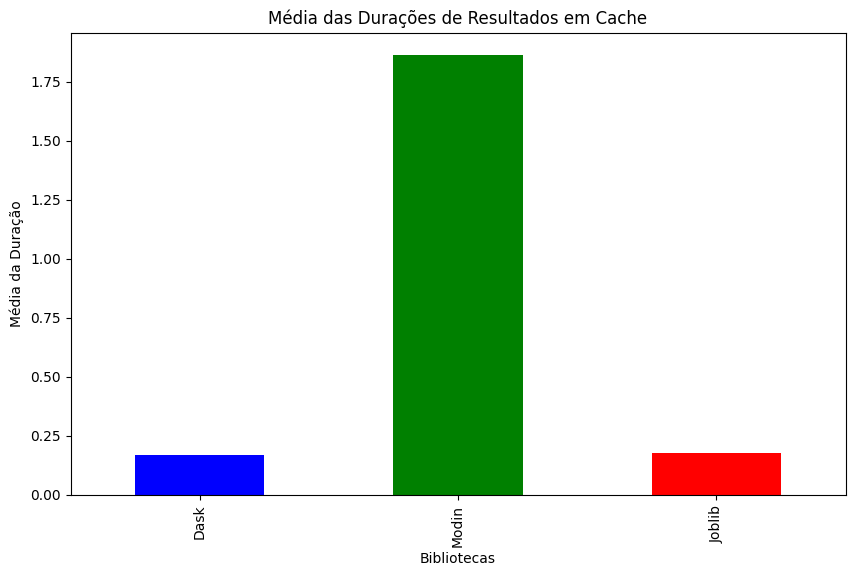

In [15]:
mean_durations_cache = resultados_cache_concatenado.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

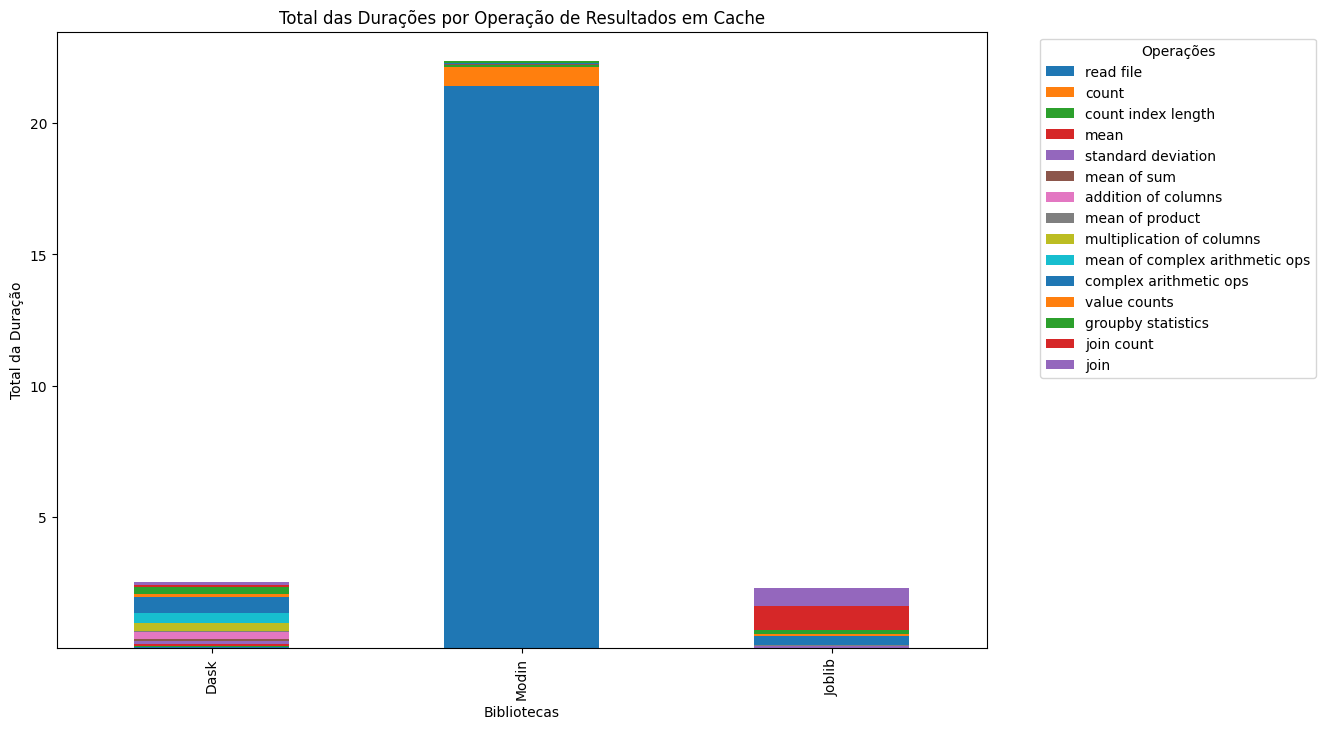

In [16]:
resultados_cache_concatenado.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados filtrados com cache (1 ficheiro):

- Joblib mantém-se como a mais rápida, seguida por Dask.
- Modin torna-se a mais lenta.


# 2 Ficheiros

# Dados

In [17]:
resultados_standard_concatenado2 = pd.concat([
    koalas_standard2['duration'], dask_standard2['duration'], modin_standard2['duration'],
], axis=1, keys=['Koalas', 'Dask', 'Modin'])
resultados_standard_concatenado2

,Koalas,Dask,Modin
task,,,
count,0.188467,0.014253,0.000015
count index length,0.110545,0.006908,0.000004
mean,0.459912,16.305419,0.060227
standard deviation,0.490740,16.506136,0.333059
mean of sum,0.614201,16.219947,0.165117
mean of product,0.600098,16.085194,0.166052
value counts,1.599671,16.023526,0.320892
groupby statistics,1.454074,16.776670,1.210819
addition of columns,NaN,18.256024,0.149687


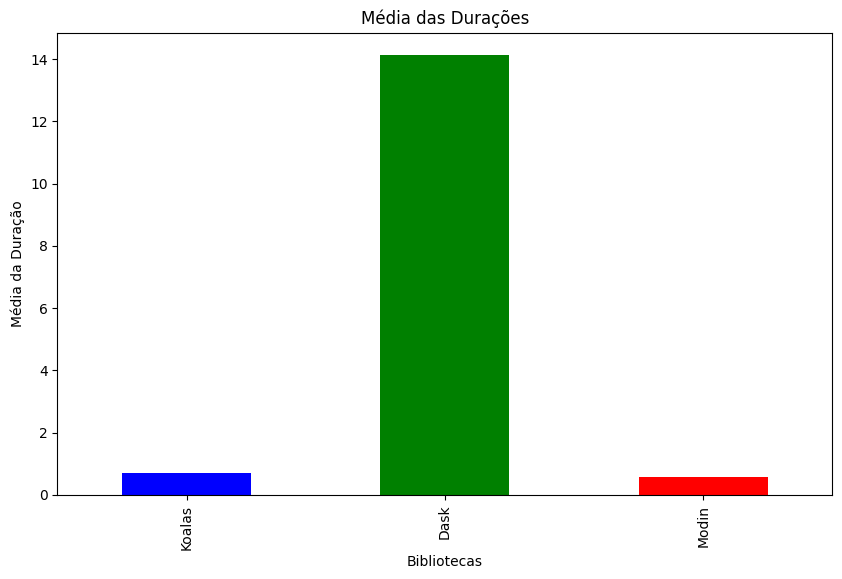

In [18]:
mean_durations_standard2 = resultados_standard_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_standard2.plot(kind='bar', color=colors)
plt.title('Média das Durações')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

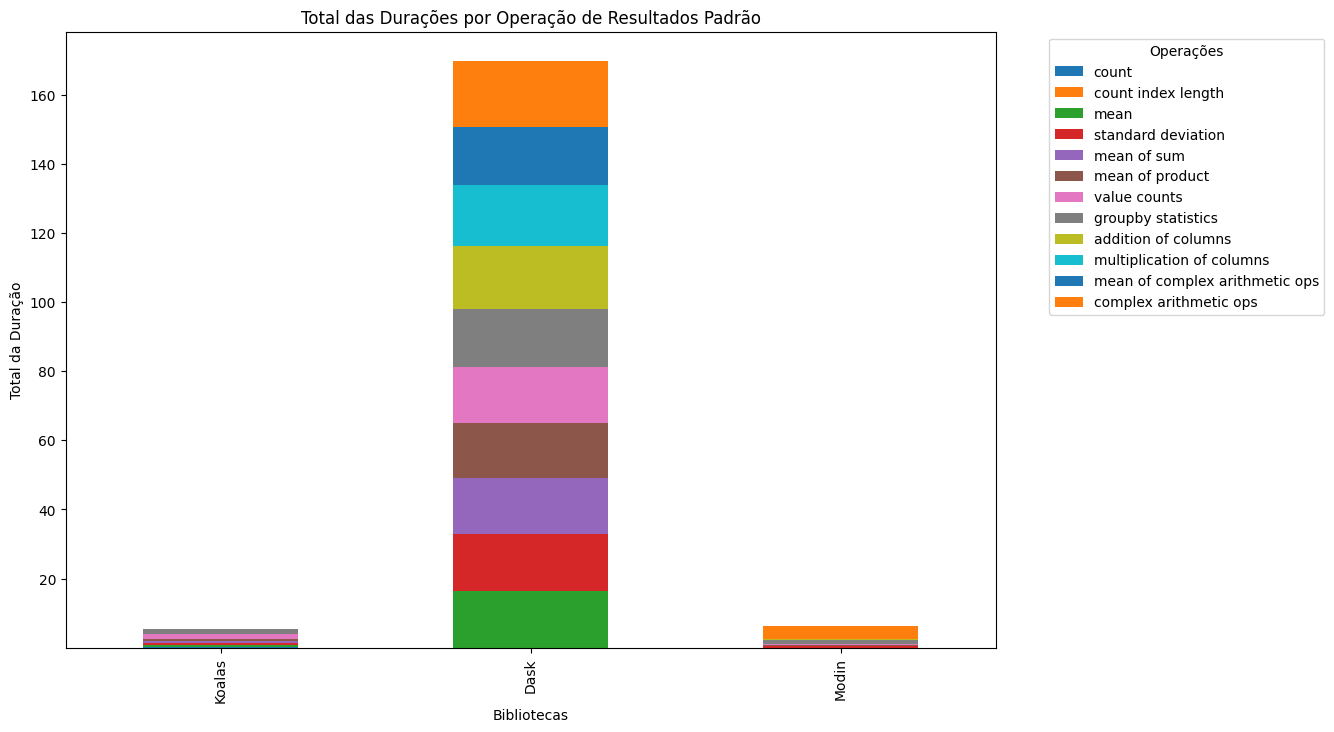

In [19]:
resultados_standard_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados Padrão')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

De forma geral:

- Modin e Koalas apresentam o melhor desempenho.
- Dask é o que tem o desempenho menos favorável.


# Dados Filtrados

In [20]:
resultados_filtered_concatenado2 = pd.concat([
    koalas_filtered2['duration'], dask_filtered2['duration'], modin_filtered2['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin'])

resultados_filtered_concatenado2

,Koalas,Dask,Modin
task,,,
count,0.078855,17.575851,0.000012
count index length,0.070080,16.610377,0.000005
mean,0.274277,16.875763,0.015623
standard deviation,0.383212,16.665055,0.070431
mean of sum,0.446260,16.604922,0.031339
mean of product,0.517670,16.704484,0.031000
value counts,1.172370,16.931671,0.081831
groupby statistics,1.501306,16.581735,0.301315
addition of columns,NaN,17.541855,0.026841


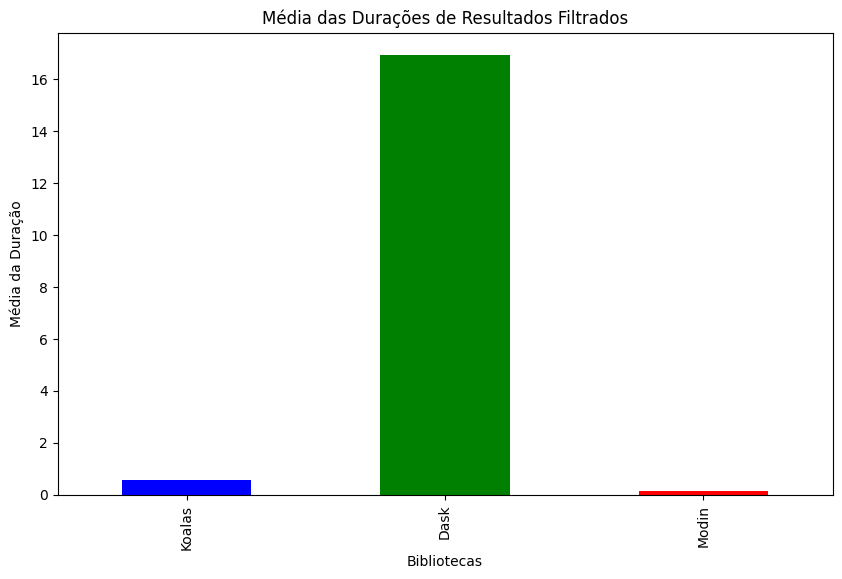

In [21]:
mean_durations_filtered2 = resultados_filtered_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered2.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

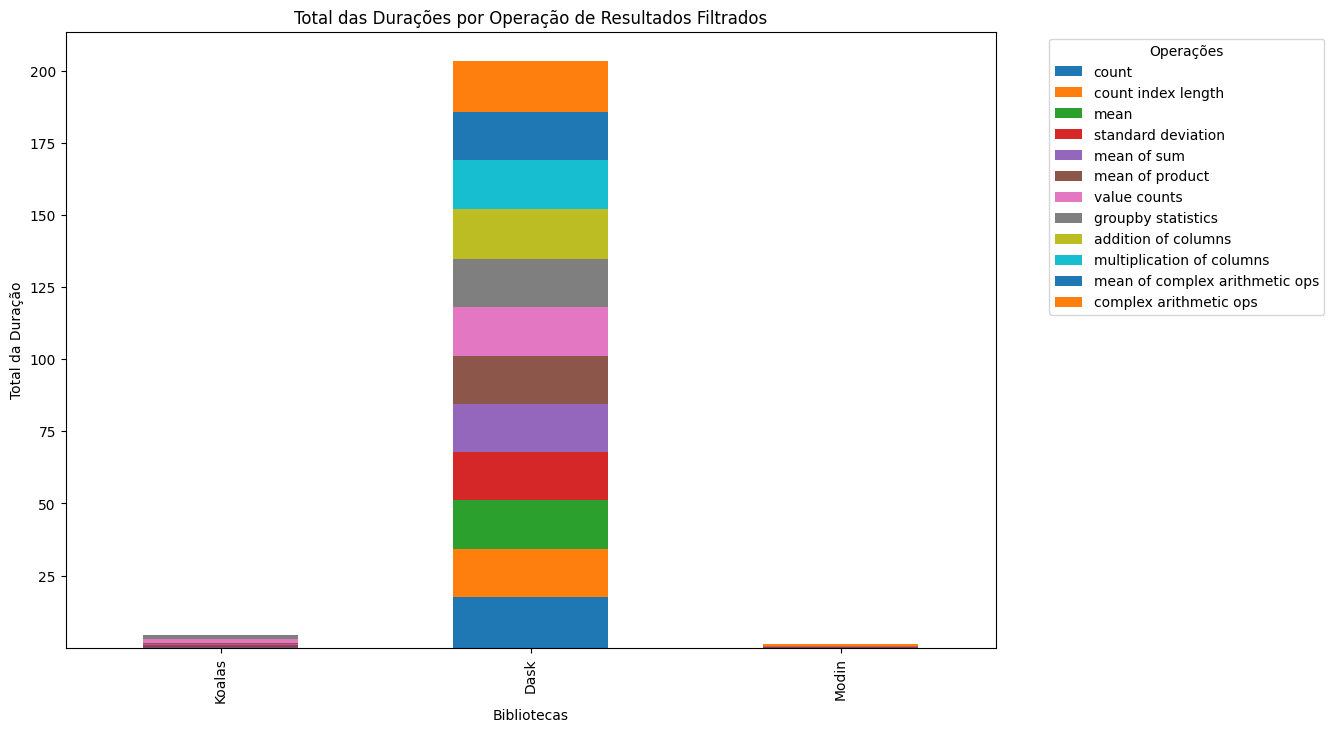

In [22]:
resultados_filtered_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados filtrados:

- Modin e Koalas são os mais rápidos.
- Dask continua como o mais lento.

# Dados Filtrados com Cache

In [23]:
resultados_cache_concatenado2 = pd.concat([
    dask_cache2['duration'], modin_cache2['duration']
], axis=1, keys=['Dask', 'Modin'])

resultados_cache_concatenado2

,Dask,Modin
task,,
count,1.607431,29.612004
count index length,0.028012,0.065783
mean,0.050365,0.001077
standard deviation,0.109487,0.004884
mean of sum,0.067492,0.001774
addition of columns,0.555636,0.001951
mean of product,0.070611,0.001565
multiplication of columns,0.568152,0.001826
mean of complex arithmetic ops,0.392845,NaN


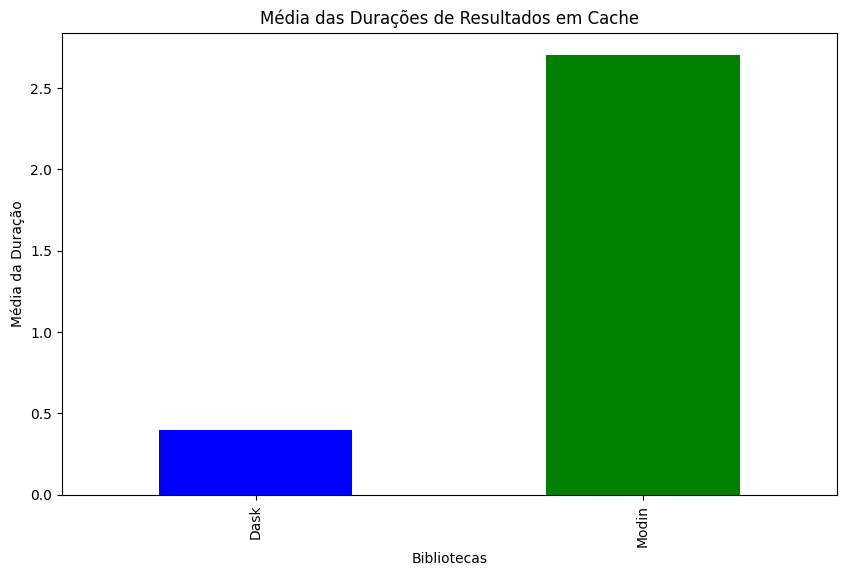

In [24]:
mean_durations_cache2 = resultados_cache_concatenado2.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache2.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

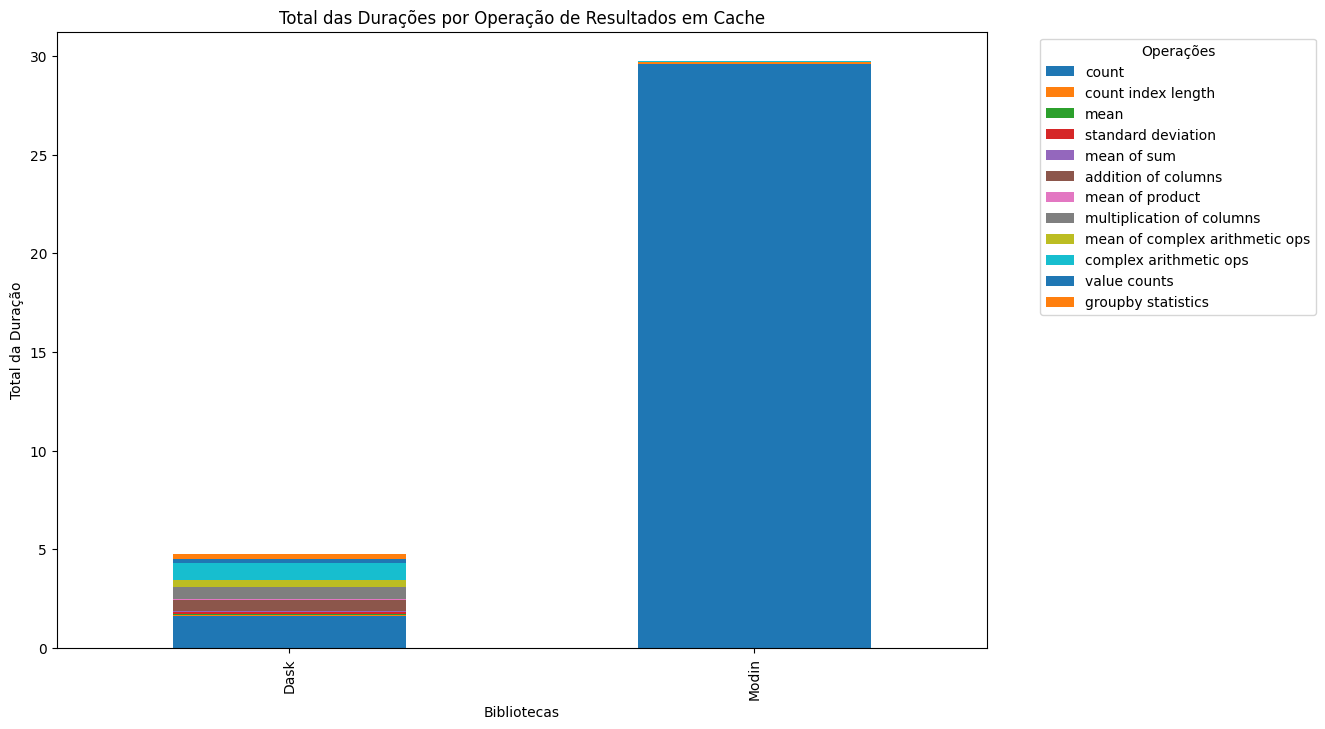

In [25]:
resultados_cache_concatenado2.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados com cache:

- Modin é o mais rápido, sem ser operação count é a mais demorada.
- Dask já é mais consistente em termos de tempo por operação



# 3 Ficheiros

# Dados

In [26]:
resultados_standard_concatenado3 = pd.concat([
    koalas_standard3['duration'], dask_standard3['duration'], modin_standard3['duration']
], axis=1, keys=['Koalas', 'Dask', 'Modin'])

resultados_standard_concatenado3

,Koalas,Dask,Modin
task,,,
count,0.100488,0.015950,0.000009
count index length,0.092547,0.005138,0.000002
mean,0.372806,50.260206,0.091190
standard deviation,0.450633,20.033471,0.513180
mean of sum,0.697650,35.095469,0.257434
mean of product,0.728425,33.937149,0.255933
value counts,1.303024,NaN,0.496008
groupby statistics,1.605773,NaN,1.873128
addition of columns,NaN,20.815864,0.231305


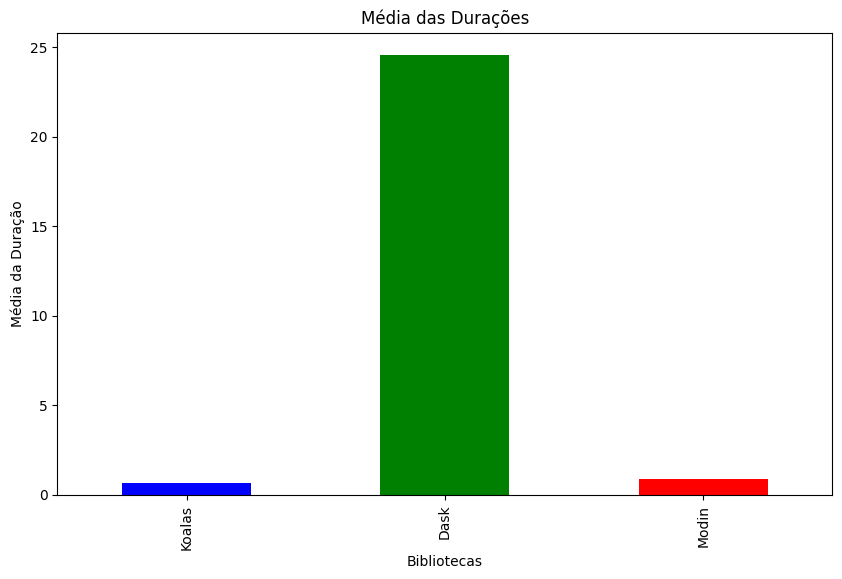

In [27]:
mean_durations_standard3 = resultados_standard_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_standard3.plot(kind='bar', color=colors)
plt.title('Média das Durações')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

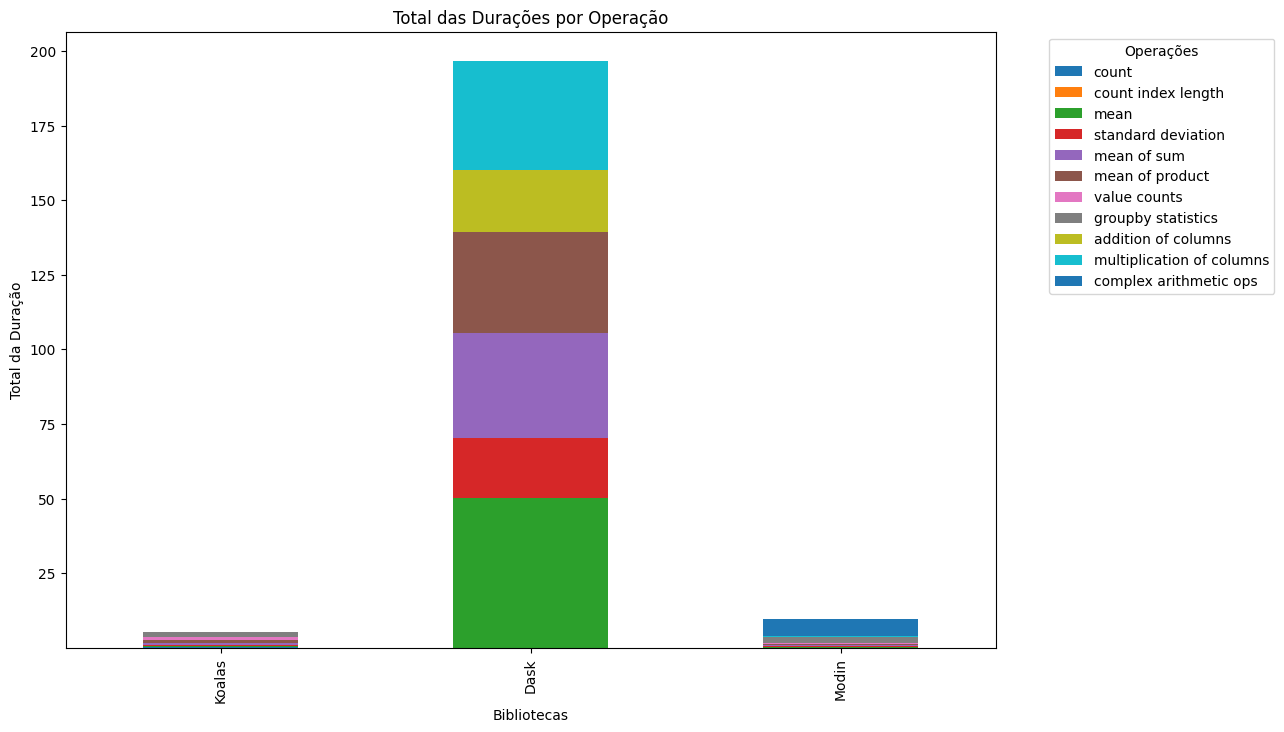

In [28]:
resultados_standard_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados com 3 ficheiros:

- Modin e Koalas são as bibliotecas mais rápidas, com desempenhos semelhantes.
- Dask é o mais lento.
- No Modin, a operação complex arithmetic ops tem o maior tempo de execução dentro da biblioteca.


# Dados Filtrados

In [29]:
resultados_filtered_concatenado3 = pd.concat([
    koalas_filtered3['duration'], dask_filtered3['duration'], modin_filtered3['duration'], 
], axis=1, keys=['Koalas', 'Dask', 'Modin'])

resultados_filtered_concatenado3

,Koalas,Dask,Modin
task,,,
count,0.059304,17.907570,0.000005
count index length,0.059749,17.261649,0.000001
mean,0.334668,32.771293,0.022949
standard deviation,0.412029,17.892437,0.127806
mean of sum,0.536743,47.551243,0.063530
mean of product,0.514372,49.403522,0.064362
value counts,1.266447,34.550583,0.126803
groupby statistics,1.546516,65.050781,0.476906
addition of columns,NaN,19.490958,0.057974


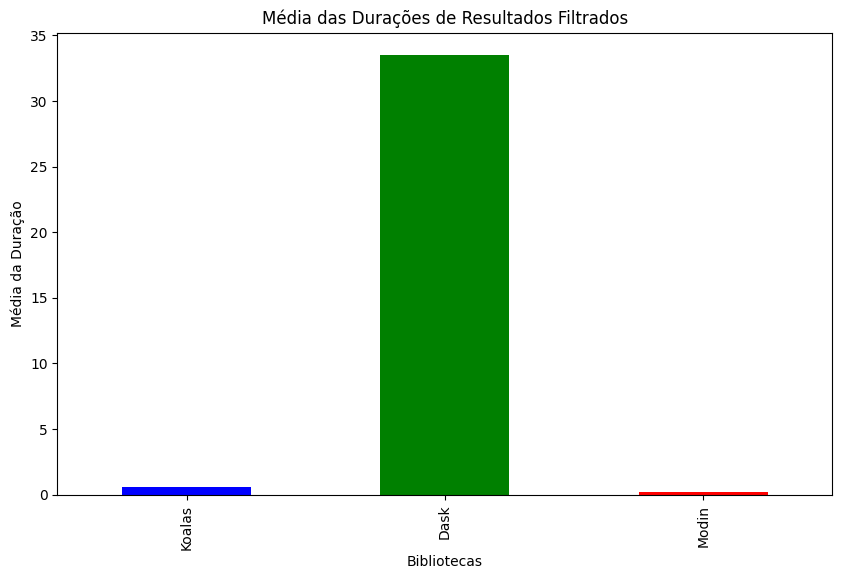

In [30]:
mean_durations_filtered3 = resultados_filtered_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_filtered3.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

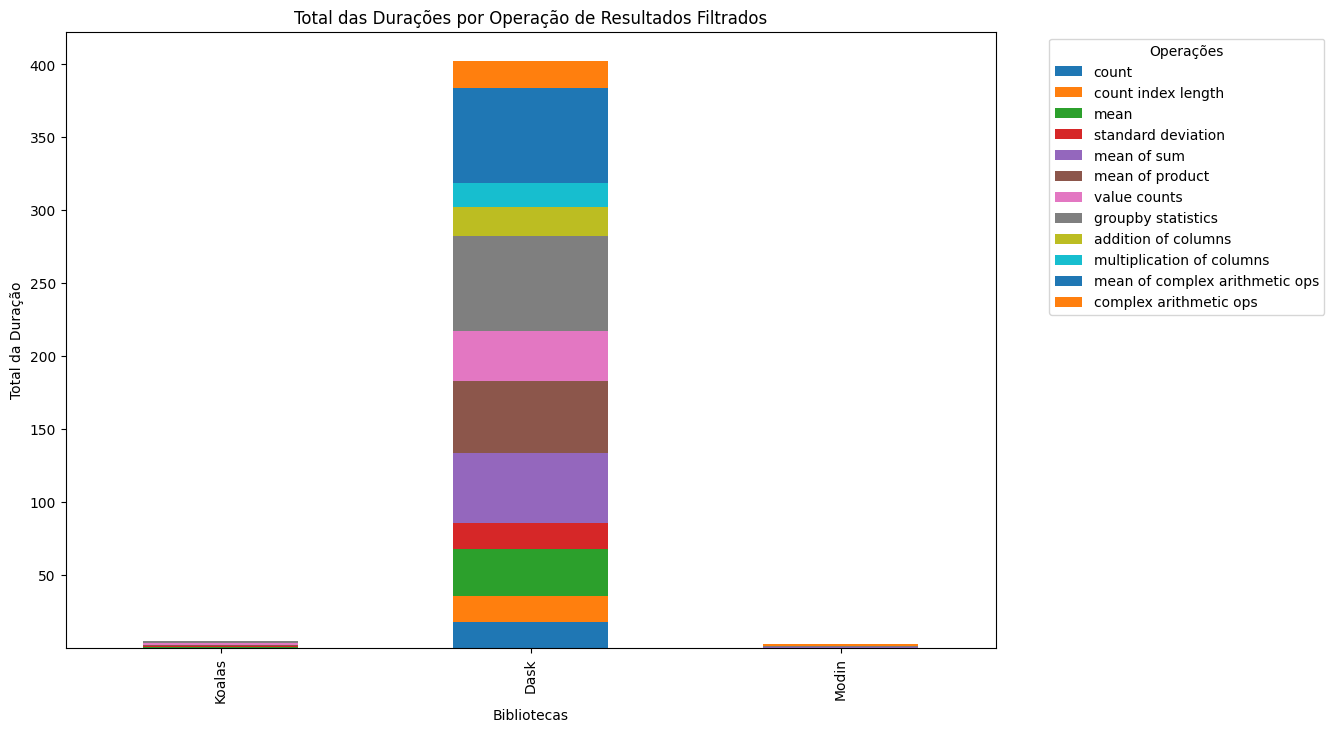

In [31]:
resultados_filtered_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados Filtrados')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados filtrados com 3 ficheiros:

- Modin apresenta o melhor desempenho.
- Dask continua a ser a biblioteca com menor desempenho.
- As operações mostram tempos de execução relativamente semelhantes entre as bibliotecas.


# Dados Filtados com Cache

In [32]:
resultados_cache_concatenado3 = pd.concat([
    dask_cache3['duration'], modin_cache3['duration'],
], axis=1, keys=['Dask', 'Modin'])

resultados_cache_concatenado3

,Dask,Modin
task,,
count,0.032220,0.071512
count index length,0.039801,0.072427
mean,0.053370,0.001202
standard deviation,0.112491,0.004634
mean of sum,0.075464,0.002048
addition of columns,0.854896,0.002357
mean of product,0.066767,0.002550
multiplication of columns,0.861218,0.002146
mean of complex arithmetic ops,0.438065,NaN


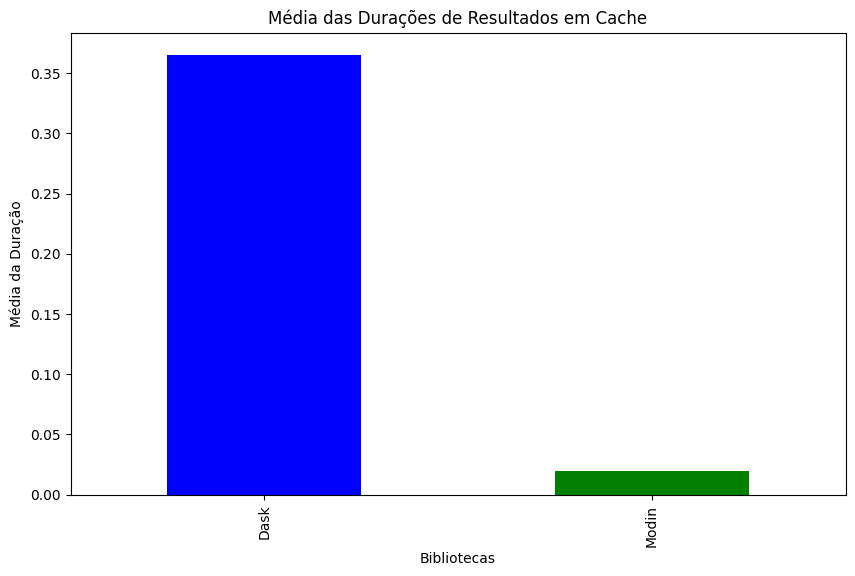

In [33]:
mean_durations_cache3 = resultados_cache_concatenado3.mean()
plt.figure(figsize=(10, 6))
mean_durations_cache3.plot(kind='bar', color=colors)
plt.title('Média das Durações de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Média da Duração')
plt.show()

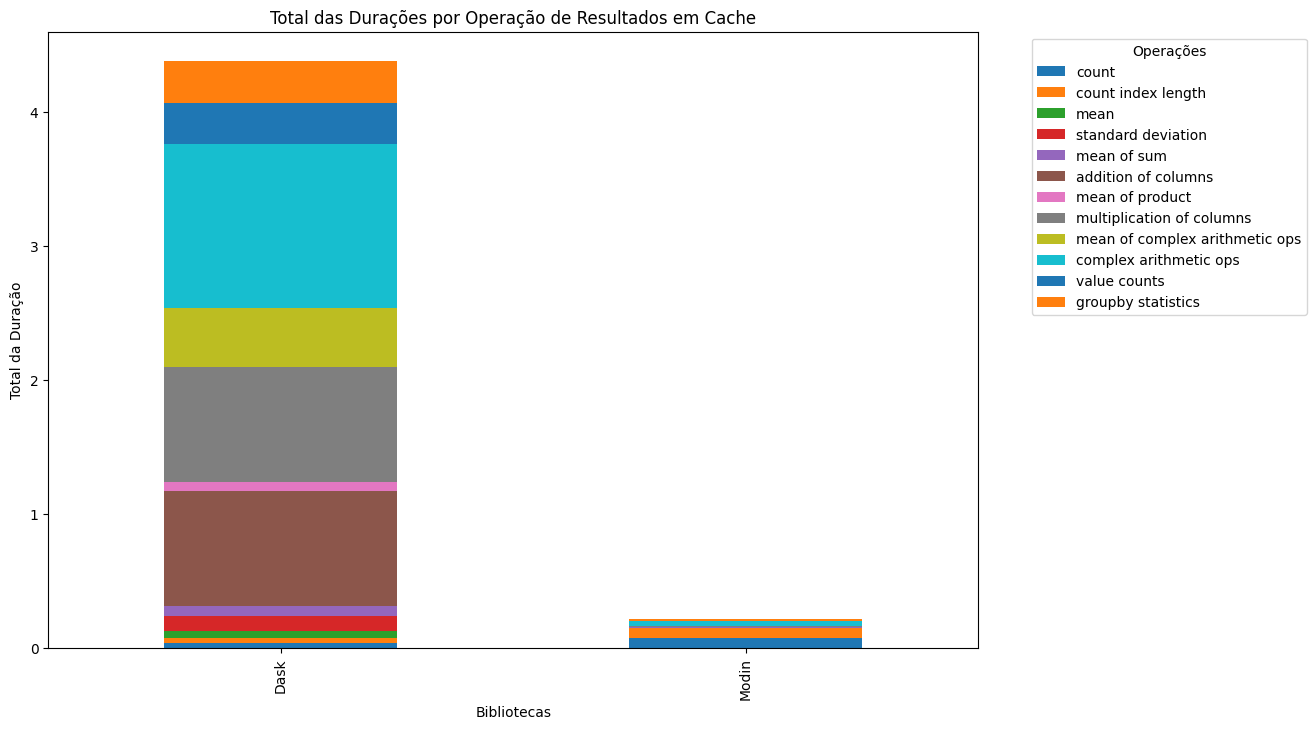

In [34]:
resultados_cache_concatenado3.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total das Durações por Operação de Resultados em Cache')
plt.xlabel('Bibliotecas')
plt.ylabel('Total da Duração')
plt.legend(title='Operações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Observações

Nos dados com cache do conjunto com 3 ficheiros:

- Modin se destaca como a biblioteca mais rápida.
- Dask encontra-se lenta


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

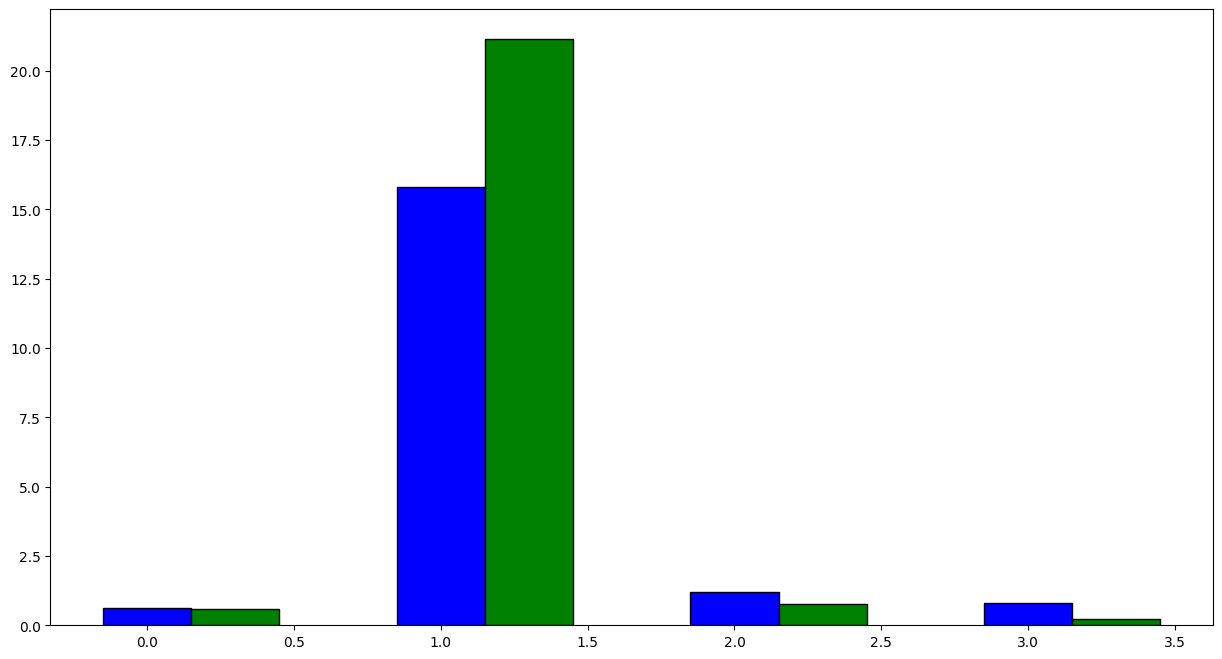

In [35]:
all_results_standard = pd.concat([resultados_standard_concatenado, resultados_standard_concatenado2, resultados_standard_concatenado3])
all_results_filtered = pd.concat([resultados_filtered_concatenado, resultados_filtered_concatenado2, resultados_filtered_concatenado3])
all_results_cache = pd.concat([resultados_cache_concatenado, resultados_cache_concatenado2, resultados_cache_concatenado3])

mean_durations_standard = all_results_standard.mean()
mean_durations_filtered = all_results_filtered.mean()
mean_durations_cache = all_results_cache.mean()

colors = ['blue', 'green', 'red', 'purple', 'orange']

operations = mean_durations_standard.index

bar_width = 0.3

r1 = np.arange(len(operations))

plt.figure(figsize=(15, 8))

plt.bar(r1, mean_durations_standard, color=colors[0], width=bar_width, edgecolor='black', label='Dados Completos')
plt.bar(r1 + bar_width, mean_durations_filtered, color=colors[1], width=bar_width, edgecolor='black', label=' Dados Filtrados')
plt.bar(r1 + 2*bar_width, mean_durations_cache, color=colors[2], width=bar_width, edgecolor='black', label='Dados Filtrados com Cache')

plt.xlabel('Operações', fontweight='bold')
plt.ylabel('Tempo Médio de Execução', fontweight='bold')
plt.title('Tempo Médio de Execução por Operação e Modo de Processamento')
plt.xticks([r + bar_width for r in range(len(operations))], operations)
plt.legend()

plt.show()

## Observações

- O Dask com cache tem o melhor tempo de execução comparado aos outros modos, mostrando grande melhora em relação à execução sem cache, que é a mais lenta.
- Filtrar os dados melhora o desempenho em todas as bibliotecas, e usar cache junto com filtro proporciona os melhores tempos.